In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#Import basic libraries
%matplotlib inline


import os
import sys
import settings
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from django_pandas.io import read_frame
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates

from matplotlib.dates import date2num

In [3]:
#Prepare to load stock data as pandas dataframe from source. In this case, prepare django
import django
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'rest.settings')
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()

from stocks.models import Listing, Stock

In [32]:
#Load data into dataframe
path = 'store_daily.h5'
store = pd.HDFStore(path)

df = store['df']
df.replace(np.nan,0, inplace=True)


In [5]:
df.head()

,500002,500003,500008,500009,500010,500012,500013,500014,500016,500020,...,700064,700065,700091,710028,750643,780007,780008,780013,780014,780016
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1287.00,196.05,720.00,15.85,2433.75,35.50,5.05,1.28,0.00,77.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,1294.65,198.70,727.20,16.25,2466.20,37.90,5.08,1.33,7.96,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,1321.45,192.90,720.55,17.05,2454.75,37.45,5.03,1.27,7.66,83.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-06,1286.70,186.05,716.10,17.90,2384.45,35.65,5.13,1.32,8.00,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-07,1307.35,185.35,726.35,18.75,2413.05,37.25,5.06,1.30,7.72,79.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
correlation = df.corr(method ='pearson')
#correlation.replace(np.nan,0, inplace=True)
correlation.head()

,500002,500003,500008,500009,500010,500012,500013,500014,500016,500020,...,700064,700065,700091,710028,750643,780007,780008,780013,780014,780016
500002,1.000000,0.284343,0.334659,0.089745,0.693307,0.483069,0.358718,0.208690,0.396821,0.357785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500003,0.284343,1.000000,0.383595,-0.033239,0.343555,0.247330,0.064164,-0.027325,0.065947,0.076356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500008,0.334659,0.383595,1.000000,-0.006753,0.534060,0.332093,0.070161,-0.022868,0.150796,0.156959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500009,0.089745,-0.033239,-0.006753,1.000000,0.039724,-0.009638,-0.123507,0.027571,-0.036726,0.054681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500010,0.693307,0.343555,0.534060,0.039724,1.000000,0.521380,0.292169,0.175093,0.359069,0.292041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import sys
!{sys.executable} -m pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 2.0 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/mnt/c/Users/anshu/Documents/experimental/env/bin/python -m pip install --upgrade pip' command.


In [10]:
import seaborn as sns
sns.set(rc={'figure.figsize':(18,18)})

<AxesSubplot:>

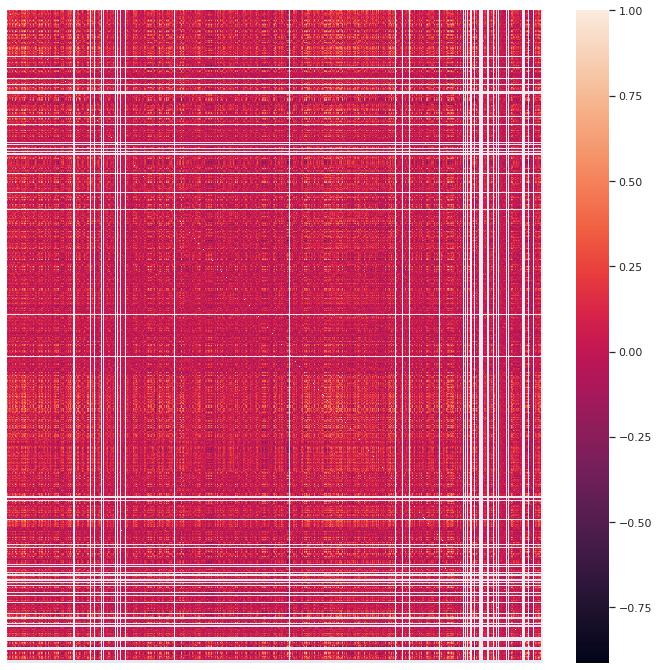

In [11]:
# plot the heatmap
# sns.heatmap(correlation, 
#         xticklabels=correlation.columns,
#         yticklabels=correlation.columns)
sns.heatmap(correlation, 
        xticklabels=False,
        yticklabels=False, mask=correlation.isnull())


In [18]:
def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    corr.replace(np.nan,0, inplace=True)
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

In [34]:
#https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb
import scipy
import scipy.cluster.hierarchy as sch


correlation.replace(np.nan,0, inplace=True)
#We use hierarchical clustering to determine which columns belongs to which cluster.
X = correlation.to_numpy() #correlation.values 
d = sch.distance.pdist(X)   # vector of ('columns' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')


In [35]:
#Map the stock to its cluster
clusters = [ind[i] for i in list((np.argsort(ind)))]
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]

In [36]:
print(clusters)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [37]:
df = df.reindex(columns, axis=1)

/tmp/ipykernel_1445/4210115703.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)


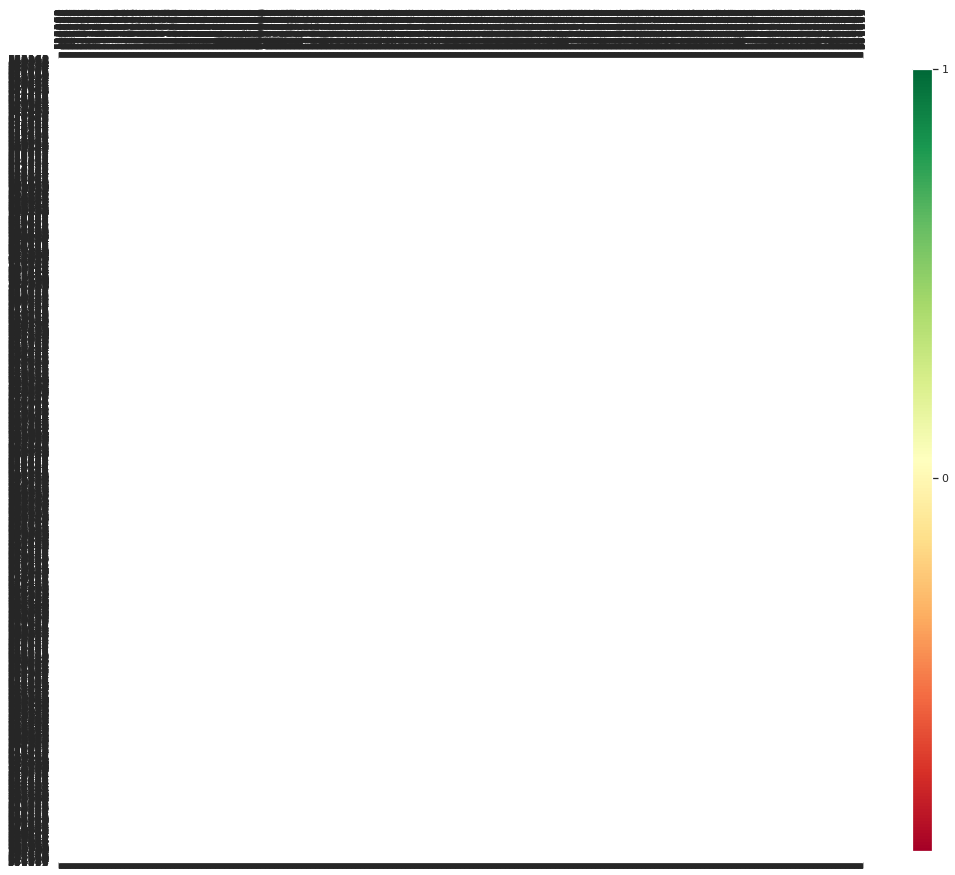

In [19]:
#plot_corr(df, size=18)